# ***KNN***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/Zoo.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Summary of the dataset
print(data.info())
print(data.describe())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

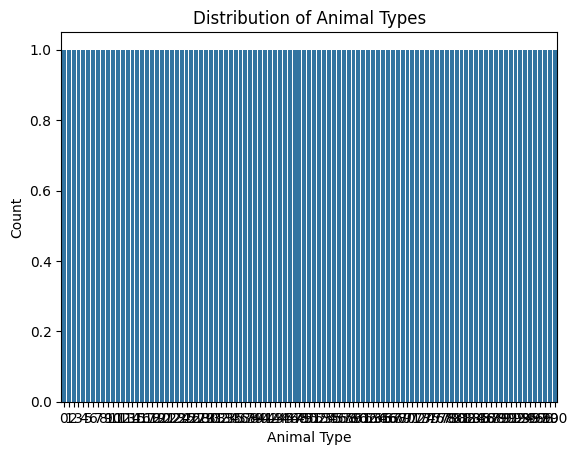

In [3]:
# Visualize the distribution of the target variable (animal type)
sns.countplot(data['type'])
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


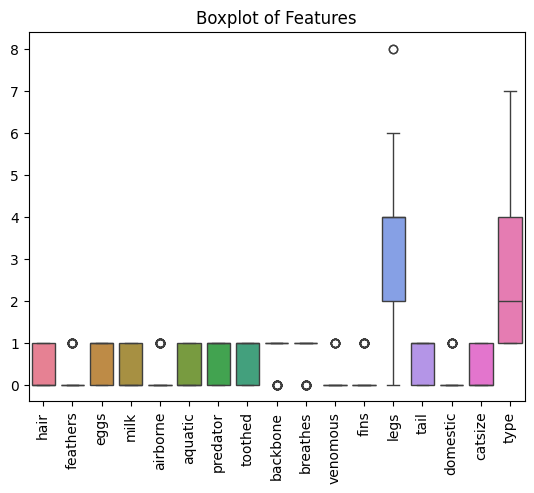

In [4]:
# Check for missing values
print(data.isnull().sum())

# Visualize the data to identify potential outliers
sns.boxplot(data=data.drop(columns=['animal name']))
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Drop the 'animal_name' column as it is not a feature
data = data.drop(columns=['animal name'])

# Define features and target
X = data.drop(columns=['type'])
y = data['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (80, 16)
Testing set size: (21, 16)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Train the KNN classifier with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<ipython-input-11-a42a2884126b>:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


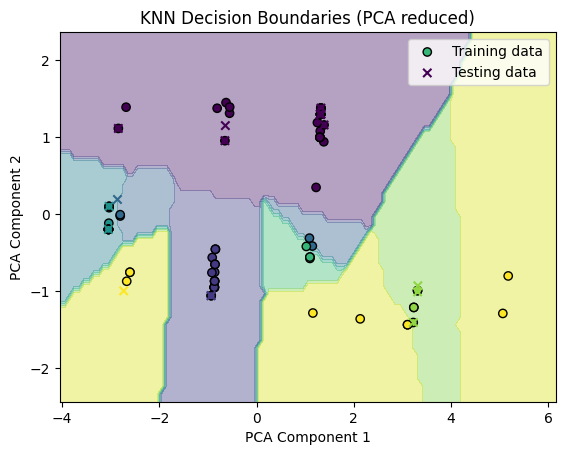

In [11]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on the reduced dataset
knn_pca = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric=grid_search.best_params_['metric'])
knn_pca.fit(X_train_pca, y_train)

# Plot decision boundaries
import numpy as np

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title('KNN Decision Boundaries (PCA reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()